In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from gensim.models import KeyedVectors
# This notebook feeds the spam SMS corpus into word2vec and trains
# logistic regression on the 300-dimensional vector resulting from
# word2vec embedding.

ModuleNotFoundError: No module named 'numpy'

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} matplotlib pandas nltk word2vec



DirectoryNotACondaEnvironmentError: The target directory exists, but it is not a conda environment.
Use 'conda create' to convert the directory to a conda environment.
  target directory: /usr/local/Cellar/ipython/8.3.0/libexec




In [3]:

! conda env list


# conda environments:
#
base                     /Users/wltrimbl/miniconda3
scipy                    /Users/wltrimbl/miniconda3/envs/scipy
tf                       /Users/wltrimbl/miniconda3/envs/tf
w2v                   *  /Users/wltrimbl/miniconda3/envs/w2v



In [4]:
!conda list | grep numpy

numpy                     1.23.5          py310h9638375_0  
numpy-base                1.23.5          py310ha98c3c9_0  


In [4]:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))


['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [6]:
wv = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [135]:
# Okay, this demo has wv.most_similar.. which takes a "positive" and a "negative" list of words
# https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html
print(wv.most_similar(positive=['mushroom'], topn=5))

[('mushrooms', 0.7716438174247742), ('chanterelle', 0.6103289127349854), ('wild_mushrooms', 0.6075051426887512), ('oyster_mushrooms', 0.5885806083679199), ('morels', 0.584884762763977)]


In [136]:
print(wv.most_similar(positive=['mushroom', "onion", "garlic", "tofu"], topn=5))

[('onions', 0.7788934707641602), ('cauliflower', 0.7541464567184448), ('mushrooms', 0.7501453161239624), ('cabbage', 0.7384436726570129), ('eggplant', 0.7381553649902344)]


In [137]:
print(wv.most_similar(positive=['mushroom', "onion", "garlic", "chicken"], topn=5))

[('onions', 0.7950847744941711), ('tomato', 0.7402370572090149), ('mushrooms', 0.7371248602867126), ('cauliflower', 0.733453631401062), ('cabbage', 0.723550021648407)]


In [140]:
print(wv.most_similar(positive=['dropout', "invest"], negative=["graduate"], topn=5))

[('investing', 0.5440436005592346), ('invested', 0.48033177852630615), ('invests', 0.4520416259765625), ('investment', 0.44751736521720886), ('reinvest', 0.441010057926178)]


In [141]:
# Okay, Cookie, which one of these things is not like the others?
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


In [11]:
# https://radimrehurek.com/gensim/models/word2vec.html
from gensim.models import KeyedVectors

In [142]:
vector = wv['computer']  # Get word2vec number for a word 
vector

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  4.,  6.,  6.,  7., 10., 17., 18.,
        22., 21., 29., 19., 29., 31., 14., 10., 12., 18., 12.,  3.,  4.,
         1.,  1.,  1.,  2.]),
 array([-0.53515625, -0.5032552 , -0.47135416, -0.43945312, -0.4075521 ,
        -0.37565103, -0.34375   , -0.31184897, -0.2799479 , -0.24804688,
        -0.21614583, -0.1842448 , -0.15234375, -0.12044271, -0.08854166,
        -0.05664062, -0.02473958,  0.00716146,  0.0390625 ,  0.07096354,
         0.10286459,  0.13476562,  0.16666667,  0.1985677 ,  0.23046875,
         0.26236978,  0.29427084,  0.32617188,  0.3580729 ,  0.38997397,
         0.421875  ], dtype=float32),
 <BarContainer object of 30 artists>)

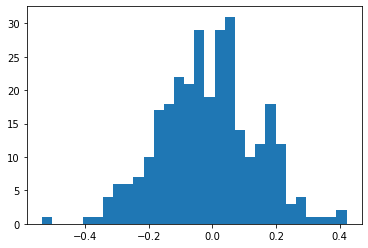

In [143]:
plt.hist(vector, bins=30)

In [144]:
spam =pd.read_csv("../data/spam.csv", encoding="latin-1")
spamclean = []
for line in open("../data/spam.csv", encoding="latin-1"):
        a = line.find(",")
        spamclean.append((line[0:a], line[a+1:]))
spam = pd.DataFrame(spamclean)
spam = spam.drop(labels=0, axis=0)  #only do this once
spam =spam.rename({0: "label", 1:"text"}, axis=1)

In [145]:
Y2 = spam.loc[:,"label"] == "spam" 
Xtext = spam.loc[:,"text"]

In [146]:
Y = np.array(Y2)

In [147]:
Xtext.iloc[0]

'"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,\n'

In [149]:
def string_to_vec(s):
    tok1 = nltk.word_tokenize(s)
    print(dir(tok1))


In [30]:
string_to_vec(Xtext.iloc[0])

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [150]:
tokens =nltk.word_tokenize(Xtext.iloc[0])

In [151]:
for t in tokens:
    print(t)

``
Go
until
jurong
point
,
crazy
..
Available
only
in
bugis
n
great
world
la
e
buffet
...
Cine
there
got
amore
wat
...
''
,
,
,


In [152]:
for t in tokens:
    print(dir(t))
    break

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [153]:
def string_to_vec(s):
    N=300
    t = np.zeros(300)
    tok1 = nltk.word_tokenize(s)
    for token in tok1:
        c = wv[token]
        t = t+c
        print(t)

In [154]:
string_to_vec("hat")

[-1.24511719e-01 -2.01416016e-02 -2.04101562e-01 -1.25000000e-01
 -1.68945312e-01 -1.20117188e-01  6.29882812e-02 -1.13281250e-01
  2.47070312e-01  1.30859375e-01  3.00292969e-02 -1.04003906e-01
  3.20434570e-03 -1.91406250e-01 -5.23437500e-01  2.15820312e-01
 -2.14843750e-01  4.63867188e-02  1.36718750e-01 -2.09960938e-01
  2.23632812e-01  3.39355469e-02  1.17187500e-01  8.25195312e-02
  1.31835938e-01 -4.00390625e-02 -1.59179688e-01 -1.78710938e-01
  2.09960938e-01  4.34570312e-02  3.27148438e-02  2.94921875e-01
  2.81250000e-01  7.72094727e-03  2.59765625e-01  3.10546875e-01
  6.68945312e-02  1.68945312e-01 -4.24804688e-02  8.00781250e-02
 -8.05664062e-02 -2.08984375e-01 -2.30712891e-02 -1.12304688e-01
  2.11914062e-01 -7.76367188e-02 -2.28515625e-01 -5.66406250e-01
  3.58886719e-02  4.58984375e-02 -4.49218750e-01  1.47460938e-01
  1.30859375e-01 -5.90820312e-02 -1.30859375e-01 -6.68945312e-02
 -4.73632812e-02 -1.07910156e-01  1.83593750e-01 -8.54492188e-03
 -2.07031250e-01 -4.85839

In [155]:
string_to_vec("hat box")

[-1.24511719e-01 -2.01416016e-02 -2.04101562e-01 -1.25000000e-01
 -1.68945312e-01 -1.20117188e-01  6.29882812e-02 -1.13281250e-01
  2.47070312e-01  1.30859375e-01  3.00292969e-02 -1.04003906e-01
  3.20434570e-03 -1.91406250e-01 -5.23437500e-01  2.15820312e-01
 -2.14843750e-01  4.63867188e-02  1.36718750e-01 -2.09960938e-01
  2.23632812e-01  3.39355469e-02  1.17187500e-01  8.25195312e-02
  1.31835938e-01 -4.00390625e-02 -1.59179688e-01 -1.78710938e-01
  2.09960938e-01  4.34570312e-02  3.27148438e-02  2.94921875e-01
  2.81250000e-01  7.72094727e-03  2.59765625e-01  3.10546875e-01
  6.68945312e-02  1.68945312e-01 -4.24804688e-02  8.00781250e-02
 -8.05664062e-02 -2.08984375e-01 -2.30712891e-02 -1.12304688e-01
  2.11914062e-01 -7.76367188e-02 -2.28515625e-01 -5.66406250e-01
  3.58886719e-02  4.58984375e-02 -4.49218750e-01  1.47460938e-01
  1.30859375e-01 -5.90820312e-02 -1.30859375e-01 -6.68945312e-02
 -4.73632812e-02 -1.07910156e-01  1.83593750e-01 -8.54492188e-03
 -2.07031250e-01 -4.85839

In [156]:
def string_to_vec(s):
    N=300
    t = np.zeros(300)
    tok1 = nltk.word_tokenize(s)
    for token in tok1:
        c = wv[token]
        t = t+c
        #print(t)
    return(t / len(tok1))

In [159]:
# TESTS
h1 = string_to_vec("hat box")
h2 = string_to_vec("box hat")
np.sum(np.abs(h1-h2))

0.0

In [160]:
h1 = string_to_vec("hat")
h2 = string_to_vec("hat hat")
np.sum(np.abs(h1-h2))

0.0

In [ ]:
h1 = string_to_vec("hat")
h2 = string_to_vec("cat")
np.sum(np.abs(h1-h2))

In [163]:
wv["nonexitsers"]

KeyError: "Key 'nonexitsers' not present"

In [46]:
h1[0:10], h2[0:10]

(array([-0.11035156, -0.02886963, -0.26904297,  0.00439453, -0.03686523,
        -0.10253906,  0.00744629, -0.06781006,  0.16113281,  0.09643555]),
 array([-0.11035156, -0.02886963, -0.26904297,  0.00439453, -0.03686523,
        -0.10253906,  0.00744629, -0.06781006,  0.16113281,  0.09643555]))

In [161]:
# MORE TESTS
h1 = string_to_vec("glibberfobble in the wind")

KeyError: "Key 'glibberfobble' not present"

In [164]:
def string_to_vec(s):
    N=300
    n=0
    t = np.zeros(300)
    tok1 = nltk.word_tokenize(s)
    for token in tok1:
        try:
            c = wv[token]
            t = t+c
            n = n+1
        except KeyError:
            pass
    return(t / n)

In [166]:
h1 = string_to_vec("glibberfobble in the wind")
h2 = string_to_vec("in the wind")

np.sum(np.abs(h1-h2))

0.0

In [169]:
X2 = Xtext.apply(string_to_vec)

In [170]:
X2.shape

(5574,)

In [ ]:
# Series of arrays...

In [171]:
X = np.stack(X2.values)

In [172]:
from numpy.random import permutation
scramble = permutation(len(X))
len(X)

5574

In [127]:
X.shape

(5574, 300)

In [181]:
# Holdout 4000:1500 since sklearn cross-validation isn't working:
Xtrain = X[scramble[0:4000],:]
Ytrain = Y[scramble[0:4000]]
Xtest =  X[scramble[4000:],:]
Ytest =  Y[scramble[4000:]]

In [81]:
X.shape

(5574, 300)

In [113]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression


In [90]:
np.isnan(X).sum()

4800

In [178]:
Xtrain[np.isnan(Xtrain)] = 0

In [92]:
np.isnan(X).sum()

0

In [179]:
model = LogisticRegression().fit(Xtrain, Ytrain*1.0)


In [ ]:
# modelcv = LogisticRegressionCV().fit(X, Y*1.0) 
# AttributeError: 'str' object has no attribute 'decode' 
#  f**ing unicode error in scipy?

In [180]:
Ypred =model.predict(Xtest)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [119]:
model.score(X,Y)

0.9705776820954432

In [94]:
type(Y)

pandas.core.series.Series

In [111]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [98]:
type(Y)

pandas.core.series.Series

In [101]:
Y.as_numeric

AttributeError: 'Series' object has no attribute 'as_numeric'

In [70]:
model = LogisticRegressionCV().fit(X, Y.to_numpy())

ValueError: setting an array element with a sequence.

In [71]:
X.shape, Y.shape

((5574,), (5574,))

In [129]:
goodmodel = LogisticRegression().fit(Xtrain, Ytrain*1.0)


In [130]:
goodmodel.score(Xtest, Ytest)

0.9650571791613723

In [ ]:
from sklearn.svm import SVC


In [132]:
svc = SVC().fit(Xtrain, Ytrain)

In [133]:
svc.score(Xtest, Ytest)

0.9853875476493011